## Coeficiente de correlacion

In [111]:
data_ads = pd.read_csv("curso_complementario/datasets/ads/Advertising.csv")

In [113]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [114]:
len(data_ads)

200

In [115]:
import numpy as np

In [118]:
data_ads["corrn"] =(data_ads["TV"]-data_ads["TV"].mean()) * (data_ads["Sales"]-data_ads["Sales"].mean())

In [117]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [119]:
data_ads["corr1"] = (data_ads["TV"]- data_ads["TV"].mean()) ** 2

In [120]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [121]:
data_ads["corr2"] = (data_ads["Sales"]-data_ads["Sales"].mean()) ** 2

In [122]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [123]:
corr_pearson = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))

In [124]:
corr_pearson

0.782224424861606

In [128]:
def corr_coef(df, var1, var2):
    df["corrn"] =(df[var1] - df[var1].mean()) * (df[var2]-df[var2].mean())
    df["corr1"] = (df[var1] - df[var1].mean()) ** 2
    df["corr2"] = (df[var2] - df[var2].mean()) ** 2
    corr_pearson = sum(df["corrn"])/np.sqrt(sum(df["corr1"])*sum(df["corr2"]))
    return corr_pearson

In [129]:
corr_coef(data_ads,"TV", "Sales")

0.782224424861606

In [132]:
data_ads = pd.read_csv("curso_complementario/datasets/ads/Advertising.csv")

In [133]:
# para obtener los nombres de las columnas, me devuelve una lista
cols = data_ads.columns.values

In [134]:
# la correlacion es una matriz simetrica con 1 en su diagona
for x in cols:
    for y in cols:
        print(x + "," + y + " : " + str(corr_coef(data_ads, x, y)))
 


TV,TV : 1.0
TV,Radio : 0.05480866446583006
TV,Newspaper : 0.056647874965056993
TV,Sales : 0.782224424861606
Radio,TV : 0.05480866446583006
Radio,Radio : 1.0
Radio,Newspaper : 0.35410375076117545
Radio,Sales : 0.576222574571055
Newspaper,TV : 0.056647874965056993
Newspaper,Radio : 0.35410375076117545
Newspaper,Newspaper : 1.0
Newspaper,Sales : 0.22829902637616534
Sales,TV : 0.782224424861606
Sales,Radio : 0.576222574571055
Sales,Newspaper : 0.22829902637616534
Sales,Sales : 1.0


In [135]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'gasto en TV vs ventas del producto')

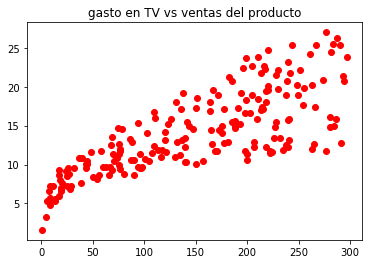

In [137]:
plt.plot(data_ads["TV"],data["Sales"],"ro" )
plt.title("gasto en TV vs ventas del producto")

Text(0.5, 1.0, 'gasto en radio vs ventas del producto')

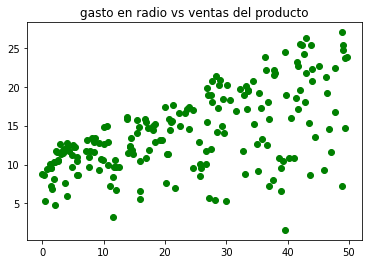

In [140]:
plt.plot(data_ads["Radio"],data["Sales"],"go" )
plt.title("gasto en radio vs ventas del producto")

Text(0.5, 1.0, 'gasto en Newspaper vs ventas del producto')

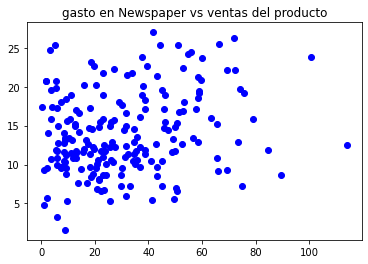

In [141]:
plt.plot(data_ads["Newspaper"],data["Sales"],"bo" )
plt.title("gasto en Newspaper vs ventas del producto")

In [143]:
# pandas ya tambien nos trae la opcion de observara la correlacion
data_ads = pd.read_csv("curso_complementario/datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


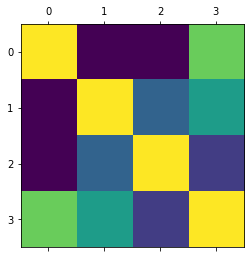

In [144]:
# podemos pintarla con
plt.matshow(data_ads.corr())
# mientras mas claro mas correlacion hay

# Modelos de Regresion Lineal
## Modelo con datos simulados

* y = a + b*x

si z=(x-u)/s depejando x nos queda x= s*z + u
* x: 100 valores distribuidos segun una N(1.5, 2.5)

* ye = 7 + 0.9 * x + e
* e estara distibuido segun una N(0, 0,8)


In [2]:
import pandas as pd
import numpy as np

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)

In [4]:
res = 0 + 0.8 * np.random.randn(100)

In [5]:
y_pred = 7 + 0.9 * x


In [6]:
y_act = 7 + 0.9 * x + res

In [7]:
x_list = x.tolist()

y_pred_list = y_pred.tolist()

y_act_list = y_act.tolist()


In [8]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_pred":y_pred_list
        
        
    }
)

In [9]:
data.head()

,x,y_actual,y_pred
0,5.418930,9.621686,11.877037
1,3.442375,10.991497,10.098137
2,0.827020,7.286238,7.744318
3,-1.129652,5.057111,5.983314
4,2.694373,9.042255,9.424936


In [11]:
import matplotlib.pyplot as plt

In [14]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, ' Valor Actual vs Prediccion')

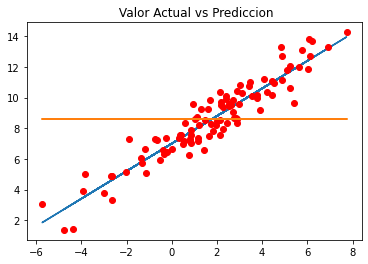

In [15]:
%matplotlib inline
plt.plot(data["x"],data["y_pred"])
plt.plot(data["x"],data["y_actual"], "ro")
plt.plot(x, y_mean)
plt.title(" Valor Actual vs Prediccion")

# promedio de valores actuales
* SSD = suma de los cuadrados de las diferencias(entre el modelo y el valor real)
* SST = suma de los cuadrados totales, ( diferencia entre el valor real y el promedio)
* SSR = suma de los cuadrados de la regresion ( diferencia entre el modelo y el promedio de los datos)

* SSD = debe distribuirse segun una  normal
* SSR =  viene explicada por el modelo
* SST = SSR + SSD

**queremos que SSD sea peque;o y que SSR sea grande y se acerque a SST**

**R^2 = SSR/SST, el mejor valor es 1, no debes tomar  el valor R^2 como unico indicador para evaluar el modelo**









In [20]:
data["SSR"] = (data["y_pred"] - data["y_actual"].mean())** 2
data["SSD"] =(data["y_pred"]- data["y_actual"]) ** 2
data["SST"] = (data["y_actual"]- data["y_actual"].mean()) ** 2


In [19]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,5.418930,9.621686,11.877037,10.856814,5.086607,1.080804
1,3.442375,10.991497,10.098137,2.298464,0.798092,5.805345
2,0.827020,7.286238,7.744318,0.701826,0.209837,1.679176
3,-1.129652,5.057111,5.983314,6.753529,0.857851,12.425329
4,2.694373,9.042255,9.424936,0.710425,0.146444,0.211772


In [21]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])


In [22]:
SSR, SST, SSD

(581.7405164300062, 667.5143255556449, 72.69987663192661)

In [23]:
SSR + SSD

654.4403930619328

In [24]:
R2 = SSR/SST

In [25]:
R2

0.8715026691685759

(array([55., 22.,  6.,  9.,  2.,  3.,  0.,  2.,  0.,  1.]),
 array([3.08300088e-05, 5.08688489e-01, 1.01734615e+00, 1.52600381e+00,
        2.03466146e+00, 2.54331912e+00, 3.05197678e+00, 3.56063444e+00,
        4.06929210e+00, 4.57794976e+00, 5.08660742e+00]),
 <BarContainer object of 10 artists>)

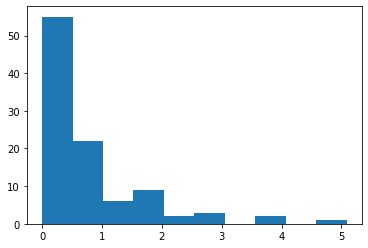

In [26]:
plt.hist(data["SSD"])

(array([ 3.,  6., 16., 11., 22., 16., 14.,  8.,  3.,  1.]),
 array([-1.99716804, -1.57191616, -1.14666427, -0.72141238, -0.29616049,
         0.1290914 ,  0.55434329,  0.97959518,  1.40484706,  1.83009895,
         2.25535084]),
 <BarContainer object of 10 artists>)

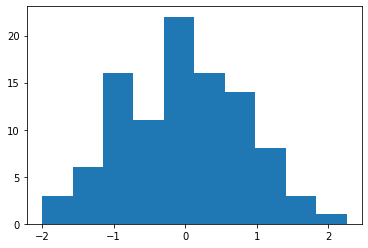

In [27]:
plt.hist(data["y_pred"]- data["y_actual"])

## Obteniendo la recta de regresion
* y = a + b * x
* b =sum((x_i-x_m)*(yi-y_m))/sum(xi-x_m)^2)
* a = y_m - b * x_m

In [28]:
x_mean = data["x"].mean()
y_mean = data["y_actual"].mean()
x_mean, y_mean

(1.7390885176961044, 8.582068865883338)

In [29]:
data["beta_n"] = (data["x"]- x_mean)*(data["y_actual"]- y_mean)

data["beta_d"] = (data["x"]-x_mean)**2

In [30]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [31]:
alpha = y_mean - beta * x_mean

In [32]:
alpha, beta

(6.999223804076637, 0.910157847458857)

 El modelo lineal obtenido por regresion es: 
    y = 6.999223804076637 + 0.910157847458857*x

In [33]:
data["y_model"] = alpha + beta * data["x"]

In [34]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,5.418930,9.621686,11.877037,10.856814,5.086607,1.080804,3.825626,13.541232,11.931305
1,3.442375,10.991497,10.098137,2.298464,0.798092,5.805345,4.103946,2.901185,10.132328
2,0.827020,7.286238,7.744318,0.701826,0.209837,1.679176,1.181886,0.831868,7.751943
3,-1.129652,5.057111,5.983314,6.753529,0.857851,12.425329,10.112188,8.229670,5.971063
4,2.694373,9.042255,9.424936,0.710425,0.146444,0.211772,0.439609,0.912569,9.451529


In [39]:
y_mean
SSR = sum((data["y_model"] - y_mean)** 2)
SSD = sum((data["y_model"]- data["y_actual"]) ** 2)
SST = sum((data["y_actual"]- y_mean) ** 2)

In [40]:
SSR, SSD, SST

(594.9170748240972, 72.59725073154675, 667.5143255556449)

In [41]:
R2 = SSR/ SST
R2

0.8912424079121941

Text(0.5, 1.0, ' Valor Actual vs Prediccion')

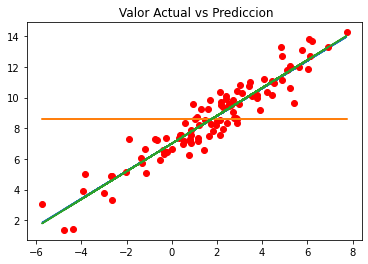

In [43]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(data["x"],data["y_pred"])
plt.plot(data["x"],data["y_actual"], "ro")
plt.plot(x, y_mean)
plt.plot(data["x"],data["y_model"])
plt.title(" Valor Actual vs Prediccion")

## Error estandar de los residuos(RSE)

In [46]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE # cuanto menor sera sera mejor para nosotros

0.8606905789950795

In [47]:
np.mean(data["y_actual"])

8.582068865883338

In [48]:
RSE / np.mean(data["y_actual"])

0.10028940485628346

## Regresion lineal simple en Python
### El paquete statsmodels para regresion lineal

In [51]:
import pandas as pd
import statsmodels.formula.api as smf

In [52]:
data = pd.read_csv("curso_complementario/datasets/ads/Advertising.csv")

In [53]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [54]:
# lineal model, en formula va la variable a predecir y las predictoras
lm =smf.ols(formula="Sales~TV", data = data).fit()

# fit conseguimos la curva que mejor se ajusta, minimiza la suma de los cuadrados de los errores

In [56]:
lm.params
# el inrtercept es a y en este caso, el 0.04 es la beta

Intercept    7.032594
TV           0.047537
dtype: float64

el modelo lineal predicitivo seria
sales =  7.032594 +  0.047537*TV

In [57]:
# evaluamos lo pvalores debe ser menor al nivel de significancia

lm.pvalues
# con esto comprobamos la hipotesis no nula, y decimos que hay relacion entre la variables
# si el pvalor es grande implica que la variable no afecta demasiado ( se podria descartar)

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [58]:
# R^2
lm.rsquared

0.611875050850071

In [59]:
lm.rsquared_adj

0.6099148238341623

In [61]:
# resumen
# mirar el AIC y  el BIC, mientras mas alto mejor, y con el minimo numero de variables
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           1.47e-42
Time:                        19:49:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:

sales_pred = lm.predict(data["TV"])
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

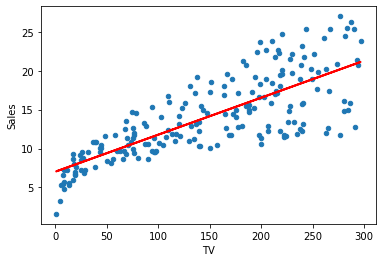

In [66]:
import matplotlib.pyplot as plt

%matplotlib inline
data.plot(kind="scatter", x = "TV", y = "Sales")
plt.plot(data["TV"], sales_pred, c="red", linewidth = 2)

In [67]:
# error estandar residual
data["sales_pred"] = 7.032594 +  0.047537 * data["TV"]

In [68]:
data["RSE"] = (data["Sales"]-data["sales_pred"]) ** 2

In [72]:
# suma de las diferencias o errores
SSD =sum(data["RSE"])
SSD

2102.5305838896525

In [73]:
RSE = np.sqrt(SSD/(len(data) - 2))

In [74]:
RSE

3.258656369238098

In [76]:
sales_m = data["Sales"].mean()
sales_m

14.0225

In [77]:
error = RSE/(sales_m)
error

0.23238768901680143

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

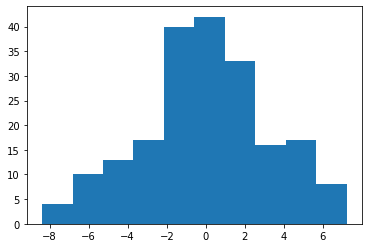

In [78]:
# visualizacion del error
plt.hist(data["Sales"]-data["sales_pred"])

## Regresion lineal multiple en Python
### El paquete statsmodel para regresion multiple
* Sales-tv
* Sales-Newspaper

* Sales- radio
* Sales -tv- Newpaper

* Sales tv- radio
* sales newspaper-radio
* sales tv-newspaper-Radio

Si k es el numero de variables predictoras posibles

los modelos posibles seran 2^(k-1) modelos

existen un par de guias para filtrar

empezar con un modelo lineal que utiliza todas las variables como predictoras

luego conservar las que tengan un pvalor bajo, descartar las de pvalor alto, un buen pvalor podria ser (pvalor = 0.05)

tambien se puede buscar aumentar el R^2, ir a;adiento poco a poco variables

enfonques

seleccion hacia adelante 0 y se van a;andiendo si la variable a;adida disminuye el RSE se agrega al modelo, pvalor pequ;o, R^2 aumenta

seleccion hacia atras se empieza con un modelo con todo y se va descartando en funcion de un pvalor, y de la conservacion del R^2
 



In [81]:
# A;dir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()


In [82]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [84]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + 0.046901*TV + 0.044219*Newspaper

In [85]:
lm2.rsquared

0.6458354938293271

In [86]:
lm2.rsquared_adj

0.6422399150864777

In [87]:
# estoy haciendo un sub-data set del data set origianl
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [88]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [90]:
SSD = sum((data["Sales"]-sales_pred) ** 2)
SSD

1918.561811896827

In [92]:
# bajo ligeramente
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

3.120719860252885

In [94]:
error = RSE/sales_m
error

0.2225508903728212

In [96]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           3.95e-45
Time:                        21:21:48   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# A;dir la radio al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [101]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           4.83e-98
Time:                        21:31:04   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# estoy haciendo un sub-data set del data set origianl
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred) ** 2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [103]:
RSE

1.681360912508001

In [104]:
RSE/sales_m
# concluimos que a;adir la radio permite disminuir el error

0.1199045043685506

In [105]:
# A;dir el Newspaper al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [107]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           1.58e-96
Time:                        21:34:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# el papel puede ser descartado porque su pvalor es alto, un coeficiente negativo
# estoy haciendo un sub-data set del data set origianl
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred) ** 2)
RSE = np.sqrt(SSD/(len(data)-3-1))


In [109]:
RSE

1.6855103734147445

In [110]:
# el error sube por la incorporacion del newspaper
RSE/sales_m
# este  modelo predice peor y es menos eficaz

0.12020041885646243

## Multicolinealidad

la relacion entre dos variables predictoras aumenta la variabilidad del coeficiente estimado, y resulta en un problema,por tanto una de estas debe eliminarse del modelo
para ello se usa una tecnica llamda vif, factor de inflacion de la varianza, nos permite detectar la multicolinealidad

si el valor es muy alto para una variable en particular, el predictor debera ser eliminado

lo mejor que puede pasar es que el vif  sea 1, si es 1 no hay correlacion

si el valor esta entre 1 y 5 hay cierta correlacion pero pueden seguir en el modelo

si el valor es mayor que 5 la correlacion es muy grande, necesitaran ser eliminadas del modelo
## factor de inflacion de la varianza
* vif = 1 : las variables no estan correlaciondas
* vif < 5 : las variables tienen correlacion moderada y se pueden quedar en el modelo
* vif > 5: las variables estan altamenta correlacionadas y deben desaparecer del modelo




In [145]:
# Newspaper ~ TV + Radio ;---->R^2 vif = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data= data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [146]:
# TV ~ Newspaper + Radio ;---->R^2 vif = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data = data).fit()
rsquared_tv = lm_tv.rsquared
VIF =1/(1-rsquared_tv)
VIF



1.0046107849396502

In [147]:
# Radio ~ TV + Newspaper ;---->R^2 vif = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data = data).fit()
rsquared_r = lm_r.rsquared
VIF =1/(1-rsquared_r)
VIF

1.1449519171055353

In [148]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           4.83e-98
Time:                        09:14:57   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Dividir el dataset en conjunto de entrenamiento y de testing
# idealmente se hace al principio

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
data = pd.read_csv("curso_complementario/datasets/ads/Advertising.csv")

In [154]:
a = np.random.randn(len(data))

(array([ 5., 12., 12., 32., 30., 31., 38., 21., 13.,  6.]),
 array([-2.40037901, -1.93548608, -1.47059315, -1.00570022, -0.5408073 ,
        -0.07591437,  0.38897856,  0.85387149,  1.31876442,  1.78365734,
         2.24855027]),
 <BarContainer object of 10 artists>)

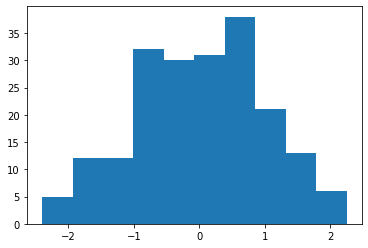

In [155]:
plt.hist(a)

In [156]:
# con esto me quedo con el 80% de los elementos

check = (a<0.8)
# me devuelve un array de booleanos
training = data[check]
testing = data[~check]


In [157]:
len(training), len(testing)

(157, 43)

In [158]:
import statsmodels.formula.api as smf
lm =smf.ols(formula="Sales~TV+Radio", data=training).fit()




In [160]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     822.4
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           6.37e-83
Time:                        10:07:16   Log-Likelihood:                -291.01
No. Observations:                 157   AIC:                             588.0
Df Residuals:                     154   BIC:                             597.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0111      0.305      9.858      0.000       2.408       3.615
TV             0.0450      0.001     30.517      0.000       0.042       0.048
Radio          0.1938      0.008     23.065      0.000       0.177       0.210
==============================================================================
Omnibus:                       19.161   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.108
Skew:                          -0.875   Prob(JB):                     1.58e-05
Kurtosis:                       3.561   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 3.0111 + 0.0450*TV +0.1938*Radio

## Validacion del modelo con el conjunto de testin

In [161]:
sales_pred =lm.predict(testing)
sales_pred

8       3.805272
12     10.884544
30     21.683201
33     18.845592
34      7.591353
35     16.894564
38     10.125750
45     15.255236
50     12.607952
65      7.920066
67     12.093044
68     19.029252
70     17.905503
76      4.559364
78      9.048395
82     10.335355
83     14.714259
84     20.956798
86     11.775627
95     16.487371
96     12.586409
99     17.179373
103    14.804506
110    14.766918
115    13.174979
116    12.049785
118    15.821465
126    10.900515
130    10.716482
136    11.721349
138     9.966220
141    18.592530
144    10.210576
146    15.236378
147    23.456764
148    12.531586
153    18.417229
157    10.007860
177    12.185980
184    18.566209
186     9.699124
188    18.582030
191     8.503409
dtype: float64

In [163]:
# comprobamos como se separa el conjunto de la prediccion del original

SSD = sum((testing["Sales"]-sales_pred)** 2)
SSD

187.3398260585797

In [164]:
RSE = np.sqrt(SSD/(len(testing-2-1)))
RSE

2.0872805611362364

In [166]:
sales_mean = testing["Sales"].mean()
error = RSE/sales_mean
error


0.16064625761385032

## Regresion lineal con Scikit learn
RFE recursive features elimination

In [169]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np

In [341]:
df = pd.read_csv("curso_complementario/datasets/gender-purchase/Gender Purchase.csv")
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [171]:
feature_cols

In [172]:
x = data[feature_cols]
y= data["Sales"]


In [176]:
estimator = SVR(kernel="linear")
selector = RFE(estimator,n_features_to_select = 2, step=1)
selector = selector.fit(x, y)

In [177]:
selector.support_
# me devuelve un array de las variables seleccionadas

array([ True,  True, False])

In [178]:
selector.ranking_
# las variables seleccionadas salen con 1, las demas se ordenan en orden decreciente en funcion de su siginificatividad
# para el modelo, una variable de rango 2 es mejor que una 3 y asi

array([1, 1, 2])

In [179]:
from sklearn.linear_model import LinearRegression


In [180]:
x_pred =x[["TV", "Radio"]]

In [181]:
lm = LinearRegression()

lm.fit(x_pred, y)

LinearRegression()

In [183]:
lm.intercept_

2.9210999124051362

In [184]:
lm.coef_

array([0.04575482, 0.18799423])

In [185]:
lm.score(x_pred, y)

0.8971942610828956

# El tratamiento de las variables categoricas

In [189]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression


In [191]:
df = pd.read_csv("curso_complementario/datasets/ecom-expense/Ecom Expense.csv")

In [192]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [194]:
dummy_gender= pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix ="City")

In [195]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [196]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [198]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [199]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()

In [200]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [201]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [211]:
feature_cols = ["Monthly Income","Transaction Time",
                "Gender_Female","Gender_Male",
                "City_Tier 1","City_Tier 2","City_Tier 3",
                "Record"]


In [212]:
x = df_new[feature_cols]
y = df_new["Total Spend"]

In [213]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [214]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [215]:
# zip me da una tupla
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.1549461254958959),
 ('Gender_Female', -131.02501325554627),
 ('Gender_Male', 131.0250132555462),
 ('City_Tier 1', 76.7643260104954),
 ('City_Tier 2', 55.13897430923245),
 ('City_Tier 3', -131.90330031972775),
 ('Record', 772.2334457445648)]

In [216]:
# el haber a;adido una variable al modelo a mejorado bastante
lm.score(x, y)

0.9179923586131016

El modelo puede ser escrito como;
Total_Spend =  -79.41713030137362 + 0.14753898049205738 * Monthly Income + Transaction Time * 0.1549461254958959 +
Gender_Female * -131.02501325554627 + Gender_Male* 131.0250132555462 + City_Tier 1* 76.7643260104954 +
City_Tier 2* 55.13897430923245) +
 City_Tier 3* -131.90330031972775)+ Record'*772.2334457445648)
 
 
 el modelo se simplifica debido a que las variables categoricos son mutuamente excluyentes

## Eliminar variables dummy redundantes

In [221]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [223]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()
# me comere la primera columna

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [224]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [225]:
feature_cols = ["Monthly Income","Transaction Time","Gender_Male","City_Tier 2","City_Tier 3","Record"]
x = df_new[feature_cols]
y = df_new["Total Spend"]

lm = LinearRegression()

lm.fit(x,y)

LinearRegression()

In [227]:
print(lm.intercept_)

-133.67781754642056


In [228]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589887),
 ('Gender_Male', 262.0500265110947),
 ('City_Tier 2', -21.62535170126259),
 ('City_Tier 3', -208.66762633022293),
 ('Record', 772.2334457445634)]

In [229]:
lm.score(x,y)
# el modelo no cambia con la enmascaracion de las variables dummy, pero tenemos el modelo simplificado

0.9179923586131016

Coeficientes con todas las variables en el modelo
antes
 * ('Monthly Income', 0.14753898049205738),
 * ('Transaction Time', 0.1549461254958959),
 * ('Gender_Female', -131.02501325554627),
 * ('Gender_Male', 131.0250132555462),
 * ('City_Tier 1', 76.7643260104954),
 * ('City_Tier 2', 55.13897430923245),
 * ('City_Tier 3', -131.90330031972775),
 * ('Record', 772.2334457445648)]
 
 Coeficientes tras enmascaras las variables dummies pertinentes
 
 despues
 
 * ('Monthly Income', 0.14753898049205744),
 * ('Transaction Time', 0.15494612549589887),
 * ('Gender_Male', 262.0500265110947),
 * ('City_Tier 2', -21.62535170126259),
 * ('City_Tier 3', -208.66762633022293),
 * ('Record', 772.2334457445634)]
 
 los cambios se reflejan en 
 * gender mal---> 131.02, despues 262.05 = (131.02-(-131.02))
 * gender_female---> -131.02, despues 0
 * ct1---->76.76, depues 0
 * ct2---->55.13, despues -21,62 = (55.13-76.76)
 * ct3---->-131.09, depues -208.66 =(-131.09 -76.76)
 
 el modelo es el mismo solo que habra una reparticion del factor a
 
 
 

In [230]:
import pandas as pd


In [231]:
data_auto = pd.read_csv("curso_complementario/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [233]:
data_auto.shape


(406, 9)

In [234]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

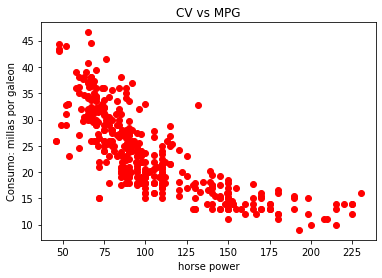

In [236]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"],data_auto["mpg"],"ro")
plt.xlabel("horse power")
plt.ylabel("Consumo: millas por galeon")
plt.title("CV vs MPG")

## Modelo de Regresion lineal
* mpg = a + b * horsepower

In [248]:
x = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
y= data_auto["mpg"].fillna(data_auto["mpg"].mean())
x_data = x.to_numpy()

In [252]:
# np.newaxis es para que se cree una nueva dimencion
lm = LinearRegression()
lm.fit(x_data.reshape(-1, 1), y)

x_data.reshape(-1, 1), x_data


(array([[130.    ],
        [165.    ],
        [150.    ],
        [150.    ],
        [140.    ],
        [198.    ],
        [220.    ],
        [215.    ],
        [225.    ],
        [190.    ],
        [115.    ],
        [165.    ],
        [153.    ],
        [175.    ],
        [175.    ],
        [170.    ],
        [160.    ],
        [140.    ],
        [150.    ],
        [225.    ],
        [ 95.    ],
        [ 95.    ],
        [ 97.    ],
        [ 85.    ],
        [ 88.    ],
        [ 46.    ],
        [ 87.    ],
        [ 90.    ],
        [ 95.    ],
        [113.    ],
        [ 90.    ],
        [215.    ],
        [200.    ],
        [210.    ],
        [193.    ],
        [ 88.    ],
        [ 90.    ],
        [ 95.    ],
        [105.0825],
        [ 48.    ],
        [100.    ],
        [105.    ],
        [100.    ],
        [ 88.    ],
        [100.    ],
        [165.    ],
        [175.    ],
        [153.    ],
        [150.    ],
        [180.    ],


In [254]:
x_data.shape, x_data.reshape(-1, 1).shape

((406,), (406, 1))

In [244]:
type(x), type(x_data)


<ipython-input-244-f3457e2947b2>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  type(x), type(x[:,np.newaxis])


(pandas.core.series.Series, numpy.ndarray)

<ipython-input-245-341b93d3b925>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(x, lm.predict(x[:,np.newaxis]), color ="blue")


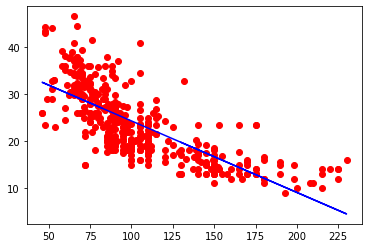

In [245]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x[:,np.newaxis]), color ="blue")

In [247]:
lm.score(x_data, y)

0.5746533406450252

In [274]:
# de data frame a un array
x_data = x.to_numpy().reshape(-1, 1)
x_data.shape

(406, 1)

In [258]:
SSD = np.sum((y-lm.predict(x_data))**2)

RSE = np.sqrt(SSD/(len(x_data)-1))

y_mean = np.mean(y)
error = RSE/y_mean

SSD, RSE, error, y_mean

(10315.751960060918,
 5.046879480825511,
 0.21462773361633472,
 23.514572864321607)

### Modelo de Regresion cuadratico

* mpg = a + b * horsepower ^2

In [260]:
x_data = x_data ** 2

In [261]:
lm = LinearRegression()
lm.fit(x_data, y)

LinearRegression()

In [263]:
lm.score(x_data, y)

0.4849887034823205

In [264]:
SSD = np.sum((y-lm.predict(x_data))**2)

RSE = np.sqrt(SSD/(len(x_data)-1))

y_mean = np.mean(y)
error = RSE/y_mean

SSD, RSE, error, y_mean

(12490.350340501926,
 5.553410772769817,
 0.23616889852998113,
 23.514572864321607)

### Modelo de regresion lineal y cuadratico

* mpg = a + b * housepower + c* housepower ^2

In [265]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [266]:
# transformacion polinomial
# este metodo necesita generar un polinomio de una potencia dada
poly = PolynomialFeatures(degree=2)

In [280]:
# de data frame a un array
x_data = x.to_numpy().reshape(-1, 1)
x_data.shape

(406, 1)

In [281]:
x_data = poly.fit_transform(x_data)


In [282]:
lm = linear_model.LinearRegression()
lm.fit(x_data, y)

LinearRegression()

In [283]:
lm.score(x_data, y)

0.6439066584257469

In [284]:
lm.intercept_

55.02619244708036

In [285]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.02619244708036 -0.43404318*hp + 0.00112615*h^2

In [290]:
x_data = x.to_numpy().reshape(-1, 1)

In [311]:
# de data frame a un array

# para un mismo r^2 siempre escogemos el de menor grado
for d in range(2, 6):
    poly = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(x.to_numpy().reshape(-1, 1))
    lm = linear_model.LinearRegression()
    lm.fit(x_data, y)
    print("regresion de grado" + str(d))
    print(lm.score(x_data, y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(x_data, y, lm.predict(x_data))
    

regresion de grado2
0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
SSD:8636.180643524502 RSE:4.61778115803654 y_mean:23.514572864321607 error:19.6379546619069%
regresion de grado3
0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD:8622.569367428549 RSE:4.614140736300907 y_mean:23.514572864321607 error:19.622473106036683%
regresion de grado4
0.6467674189704502
40.09664384818936
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD:8566.799832491353 RSE:4.5991947315797574 y_mean:23.514572864321607 error:19.55891250126879%
regresion de grado5
0.6547512489367358
-40.693812902382106
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
SSD:8373.171393635388 RSE:4.54692173544207 y_mean:23.514572864321607 error:19.336612073192548%


In [310]:
def regresion_validation (x_data, y, y_pred):
    SSD = np.sum((y-y_pred)**2)

    RSE = np.sqrt(SSD/(len(x_data)-1))

    y_mean = np.mean(y)
    error = RSE/y_mean

    print("SSD:"+str(SSD),"RSE:"+ str(RSE),"y_mean:"+ str(y_mean), "error:" +str(error * 100)+"%")
    

## El problema de los outliers

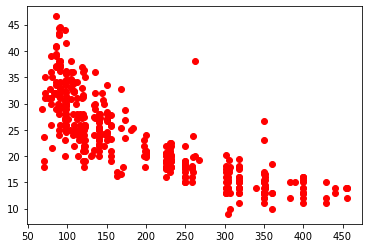

In [314]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro");

In [316]:
x = data_auto["displacement"].fillna(data_auto["displacement"].mean()).to_numpy().reshape(-1, 1)

y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(x, y)


LinearRegression()

In [320]:
lm.score(x,y)

0.6261049762826918

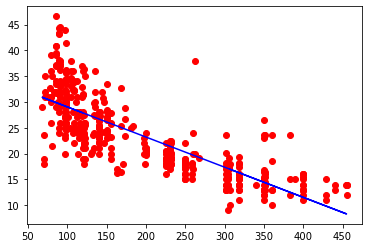

In [318]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x), color ="blue")

In [331]:

# las condiciones de filtrado van entre parentesis en caso de ser varias
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [334]:
data_auto[(data_auto["displacement"]>280) & (data_auto["mpg"]>20)]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [337]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [338]:
x = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean()).to_numpy().reshape(-1, 1)

y = data_auto_clean["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(x, y)


LinearRegression()

In [339]:
lm.score(x,y)

0.646556489442804

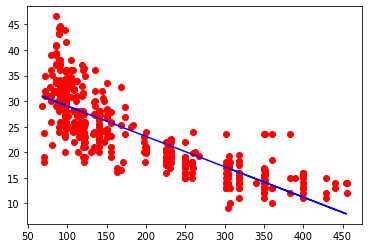

In [340]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x), color ="blue")